### Dimension reduction 
- A Technique used in machine learning and statistics to reduce the number of input variables in a dataset while retaining as much information as possible. The primary goals are to simplify models, reduce computational cost, and help in visualizing data.

## High Dimension:
- When the number of features is very large.
-  e.g: images(pixels as feature)
- if we have a dataset with 90+ features rows are just 100. 

### It can be classified into two main types:

- Feature Selection: Selecting a subset of the original variables.
- Feature Extraction: Transforming the data from a high-dimensional space to a low-dimensional space.
 
#### Purpose: To simplify models, reduce computational cost, and improve model performance.
#### Techniques:
- Feature Selection: Methods like Forward Selection, Backward Elimination, and Recursive Feature Elimination (RFE).
- Feature Extraction: Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), t-Distributed Stochastic Neighbor Embedding (t-SNE), and Autoencoders.
- Benefits: Removes multicollinearity, improves visualization, reduces overfitting, and accelerates algorithm performance.
- Applications: Used in fields like machine learning, pattern recognition, and signal processing.


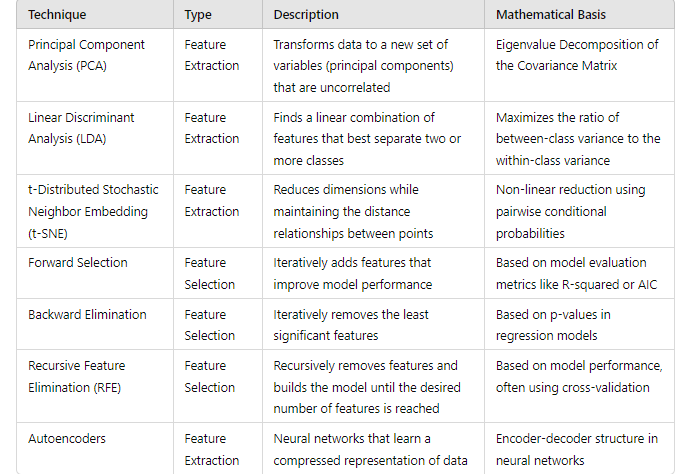

### PCA 
Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of possibly correlated variables into a set of linearly uncorrelated variables called principal components. The number of principal components is less than or equal to the number of original variables.

## Mathematical Formulation of PCA
Standardize the Data: Center the data by subtracting the mean of each feature and scaling by the standard deviation.

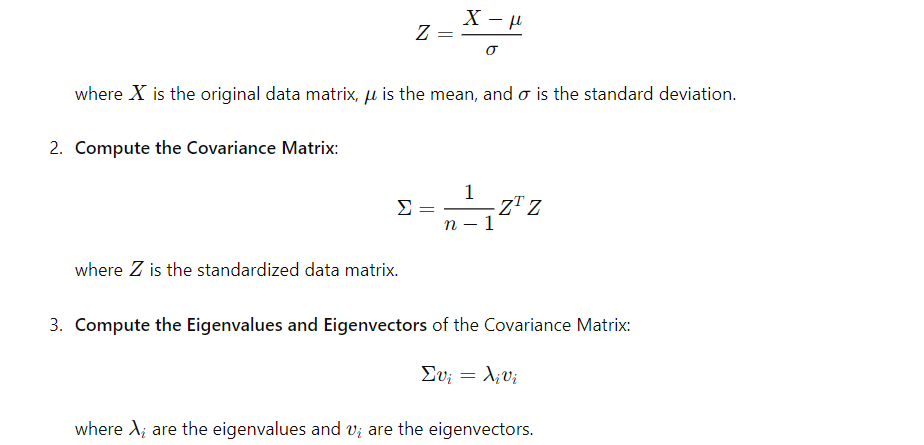

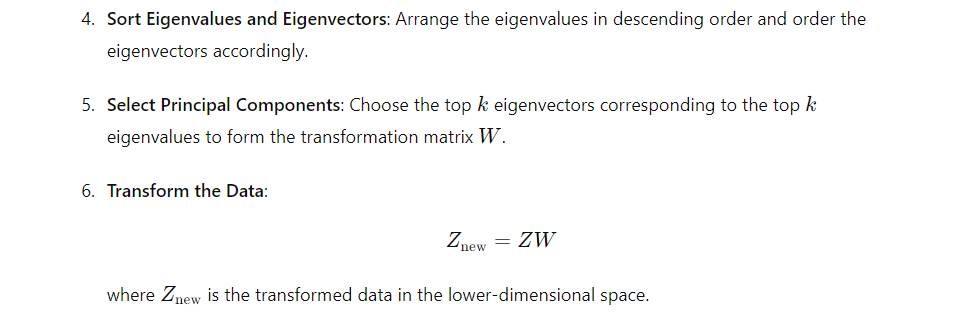


- Standardization ensures that each feature contributes equally to the analysis.
- Covariance Matrix captures the variance and covariance of the data.
- Eigenvalues and Eigenvectors determine the principal components, where eigenvalues indicate the amount of variance captured by each principal component.
- Transformation reduces the dimensionality of the data by projecting it onto the selected principal components, which capture the most variance.
- PCA is widely used for data compression, visualization, and noise reduction. It helps in understanding the structure of the data and finding patterns that are not apparent in high-dimensional spaces

In [1]:
## Importing Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to a pandas DataFrame for easier manipulation
df = pd.DataFrame(X, columns=data.feature_names)
df.head(4)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [3]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [17]:
X_pca 

array([[ 9.19283683,  1.94858307, -1.12316616],
       [ 2.3878018 , -3.76817174, -0.52929269],
       [ 5.73389628, -1.0751738 , -0.55174759],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053],
       [10.37479406,  1.67201011, -1.87702933],
       [-5.4752433 , -0.67063679,  1.49044308]])

In [19]:
# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2','PC3'])
df_pca['target'] = y

df_pca.tail(10)

,PC1,PC2,PC3,target
559,-1.089376,1.292848,1.429379,1
560,-0.481771,-0.178020,1.032108,1
561,-4.870310,-2.131106,3.414189,1
562,5.917613,3.482637,-3.262792,0
563,8.741338,-0.573855,0.897090,0
564,6.439315,-3.576817,2.459487,0
565,3.793382,-3.584048,2.088476,0
566,1.256179,-1.902297,0.562731,0
567,10.374794,1.672010,-1.877029,0
568,-5.475243,-0.670637,1.490443,1


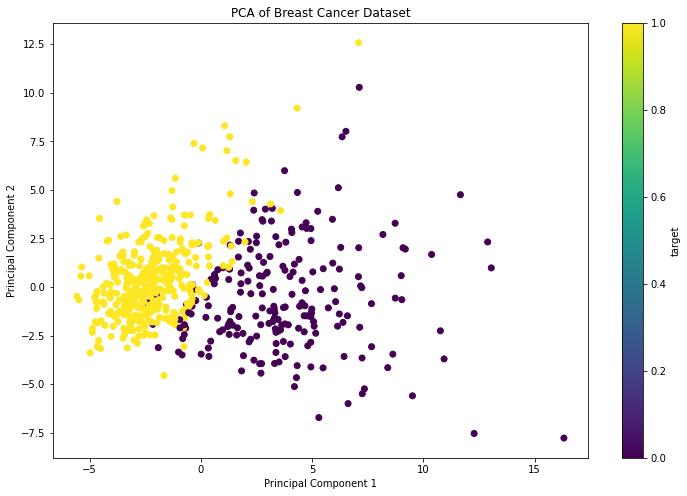

In [20]:

# Plot the PCA results
plt.figure(figsize=(12, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['target'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.colorbar(label='target')
plt.show()

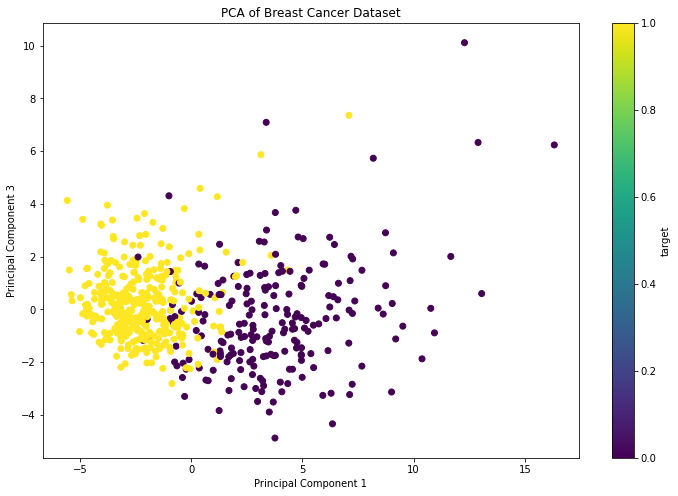

In [21]:

# Plot the PCA results
plt.figure(figsize=(12, 8))
plt.scatter(df_pca['PC1'], df_pca['PC3'], c=df_pca['target'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PCA of Breast Cancer Dataset')
plt.colorbar(label='target')
plt.show()

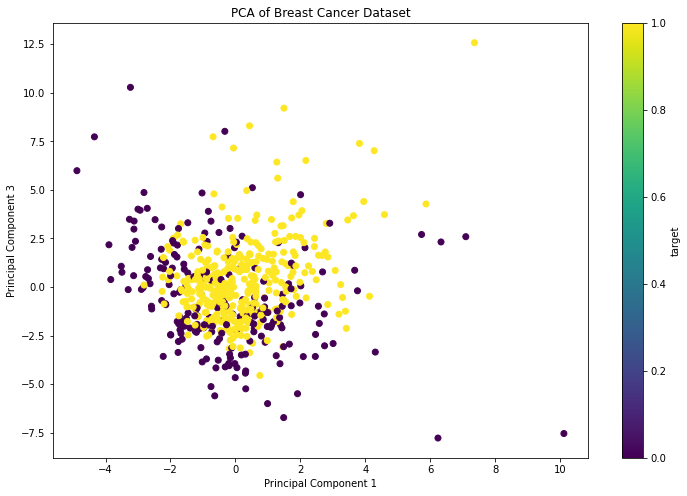

In [22]:
# Plot the PCA results
plt.figure(figsize=(12, 8))
plt.scatter(df_pca['PC3'], df_pca['PC2'], c=df_pca['target'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PCA of Breast Cancer Dataset')
plt.colorbar(label='target')
plt.show()

In [23]:

# Create a new sample (for demonstration, we'll take a sample from the original dataset)
new_sample = X[0].reshape(1, -1)

# Standardize the new sample
new_sample_scaled = scaler.transform(new_sample)

# Apply PCA to the new sample
new_sample_pca = pca.transform(new_sample_scaled)

print("Original sample:", new_sample)
print("PCA transformed sample:", new_sample_pca)


Original sample: [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]]
PCA transformed sample: [[ 9.19283683  1.94858307 -1.12316616]]
